In [6]:
from model import *
from utils import *

## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

d:\Programme\Anaconda\envs\facharbeit2\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
d:\Programme\Anaconda\envs\facharbeit2\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 512, 512, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 512, 512, 64) 36928       conv2d_24[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 256, 256, 64) 0           conv2d_25[0][0]                  
____________________________________________________________________________________________

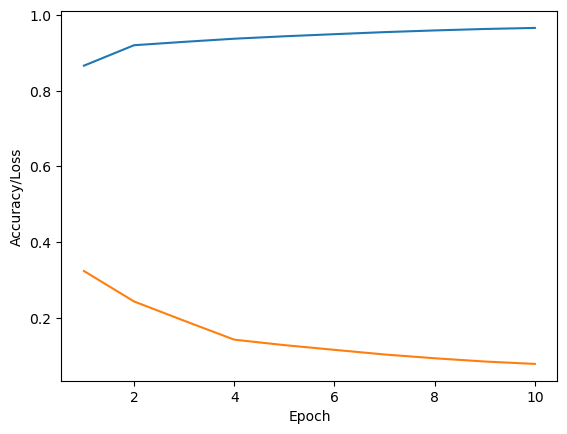

In [7]:
from keras.callbacks import EarlyStopping

# Anweisungen an die Augmentierung von Keras
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

sample_size = 56
batch_size = 2
steps = sample_size // batch_size
steps = 500 # gefahr des overfittings
epochs = 10

size = (512, 512)

generator = trainGenerator(batch_size,'data/cells/train','image','label',data_gen_args,target_size=size,target_dir = None)
model = unet(input_size=size + (1,))

# Abspeichern des Modells nach jeder Epoche, falls der Loss-Wert kleiner ist
model_checkpoint = ModelCheckpoint('unet_cells500_1.hdf5', monitor='loss',verbose=1, save_best_only=True)
# Abbruch des Trainings, wenn der Loss-Wert nach 5 Epochen nicht kleiner wird
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1)

# Callback für die Visualisierung des Loss- und accuracy-Wertes
logs = LogCallback()

model.fit_generator(generator,steps_per_epoch=steps,epochs=epochs,callbacks=[model_checkpoint, early_stopping, logs])

logs.visualise()

### test your model and save predicted results

In [8]:
from model import *
from utils import testGenerator, saveResult

testGene = testGenerator("data/cells/test", target_size=(512, 512))

model = unet(input_size=(512, 512, 1))

model.load_weights("unet_cells500_1.hdf5")

results = model.predict_generator(testGene,30,verbose=1)

saveResult("data/cells/test",results)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_48 (Conv2D)              (None, 512, 512, 64) 640         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_49 (Conv2D)              (None, 512, 512, 64) 36928       conv2d_48[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 256, 256, 64) 0           conv2d_49[0][0]                  
____________________________________________________________________________________________

d:\Programme\Anaconda\envs\facharbeit2\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


30/30 [==============================] - 2s 52ms/step
Saving results...
Results saved.
Merging images...


FileNotFoundError: No such file: 'd:\JS\facharbeit 3\data\cells\test\0_overlay_predict.png'

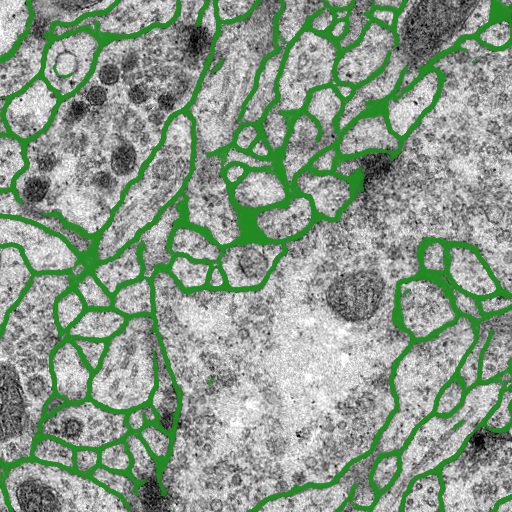

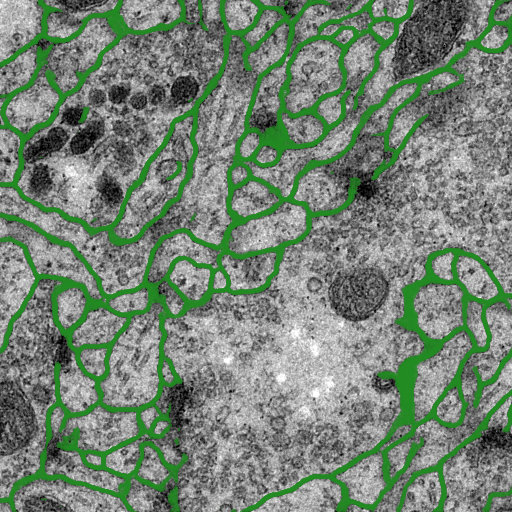

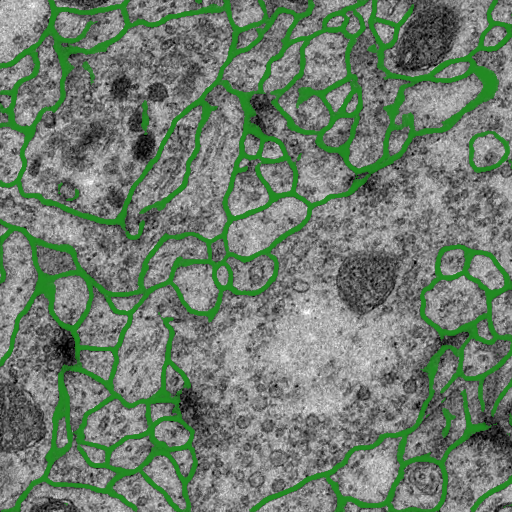

In [3]:
from data import printImage

path = "./data/cells/test/"
for i in range(0, 3):
    image = path + str(i) + ".png"
    predicted = path + str(i) + "_predict.png"
    #printImage(image)
    #printImage(predicted)
    printImage(path + str(i) + "_overlay.png")